# IMPORTING PACKAGES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_o=pd.read_excel("C:/Users/Nirav/Desktop/DataSet/cardio.xlsx")
data=data_o.copy()

In [3]:
print("total size:",data.size)

total size: 840000


In [4]:
print("total no.of instances:",data.shape)

total no.of instances: (70000, 12)


In [5]:
print("attributes in the dataset:",data.columns)

attributes in the dataset: Index(['age', 'gender', 'height', 'weight', 'bp_hi', 'bp_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [6]:
data.head()

,age,gender,height,weight,bp_hi,bp_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   bp_hi        70000 non-null  int64  
 5   bp_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [8]:
data.describe()

,age,gender,height,weight,bp_hi,bp_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Checking for missing values

In [9]:
data.isnull().sum()

age            0
gender         0
height         0
weight         0
bp_hi          0
bp_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

There are no missing values in the dataset.

# OUTLIERS DETECTION AND REMOVAL

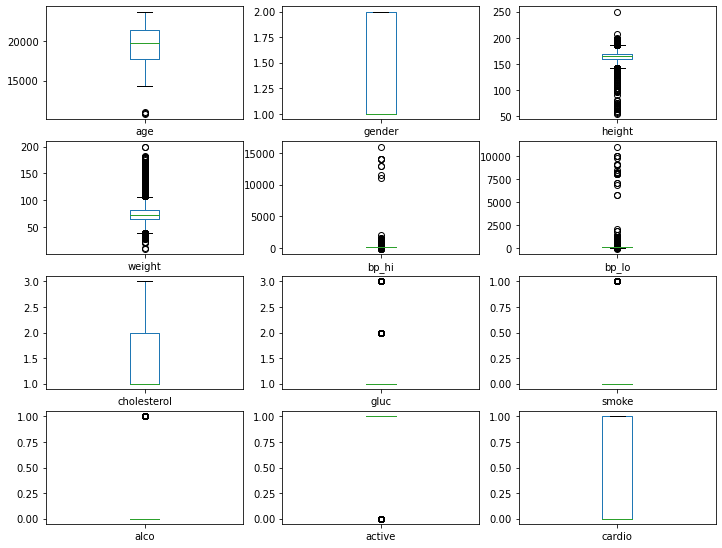

In [10]:
data.plot(kind='box',subplots='true',layout=(5,3),figsize=(12,12))
plt.show()

In [11]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

age            3663.0
gender            1.0
height           11.0
weight           17.0
bp_hi            20.0
bp_lo            10.0
cholesterol       1.0
gluc              0.0
smoke             0.0
alco              0.0
active            0.0
cardio            1.0
dtype: float64


In [12]:
data.drop(data[(data['bp_hi'] > data['bp_hi'].quantile(0.975)) | (data['bp_hi'] < data['bp_hi'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['bp_lo'] > data['bp_lo'].quantile(0.975)) | (data['bp_lo'] < data['bp_lo'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['height'] > data['height'].quantile(0.975)) | (data['height'] < data['height'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['weight'] > data['weight'].quantile(0.975)) | (data['weight'] < data['weight'].quantile(0.025))].index,inplace=True)

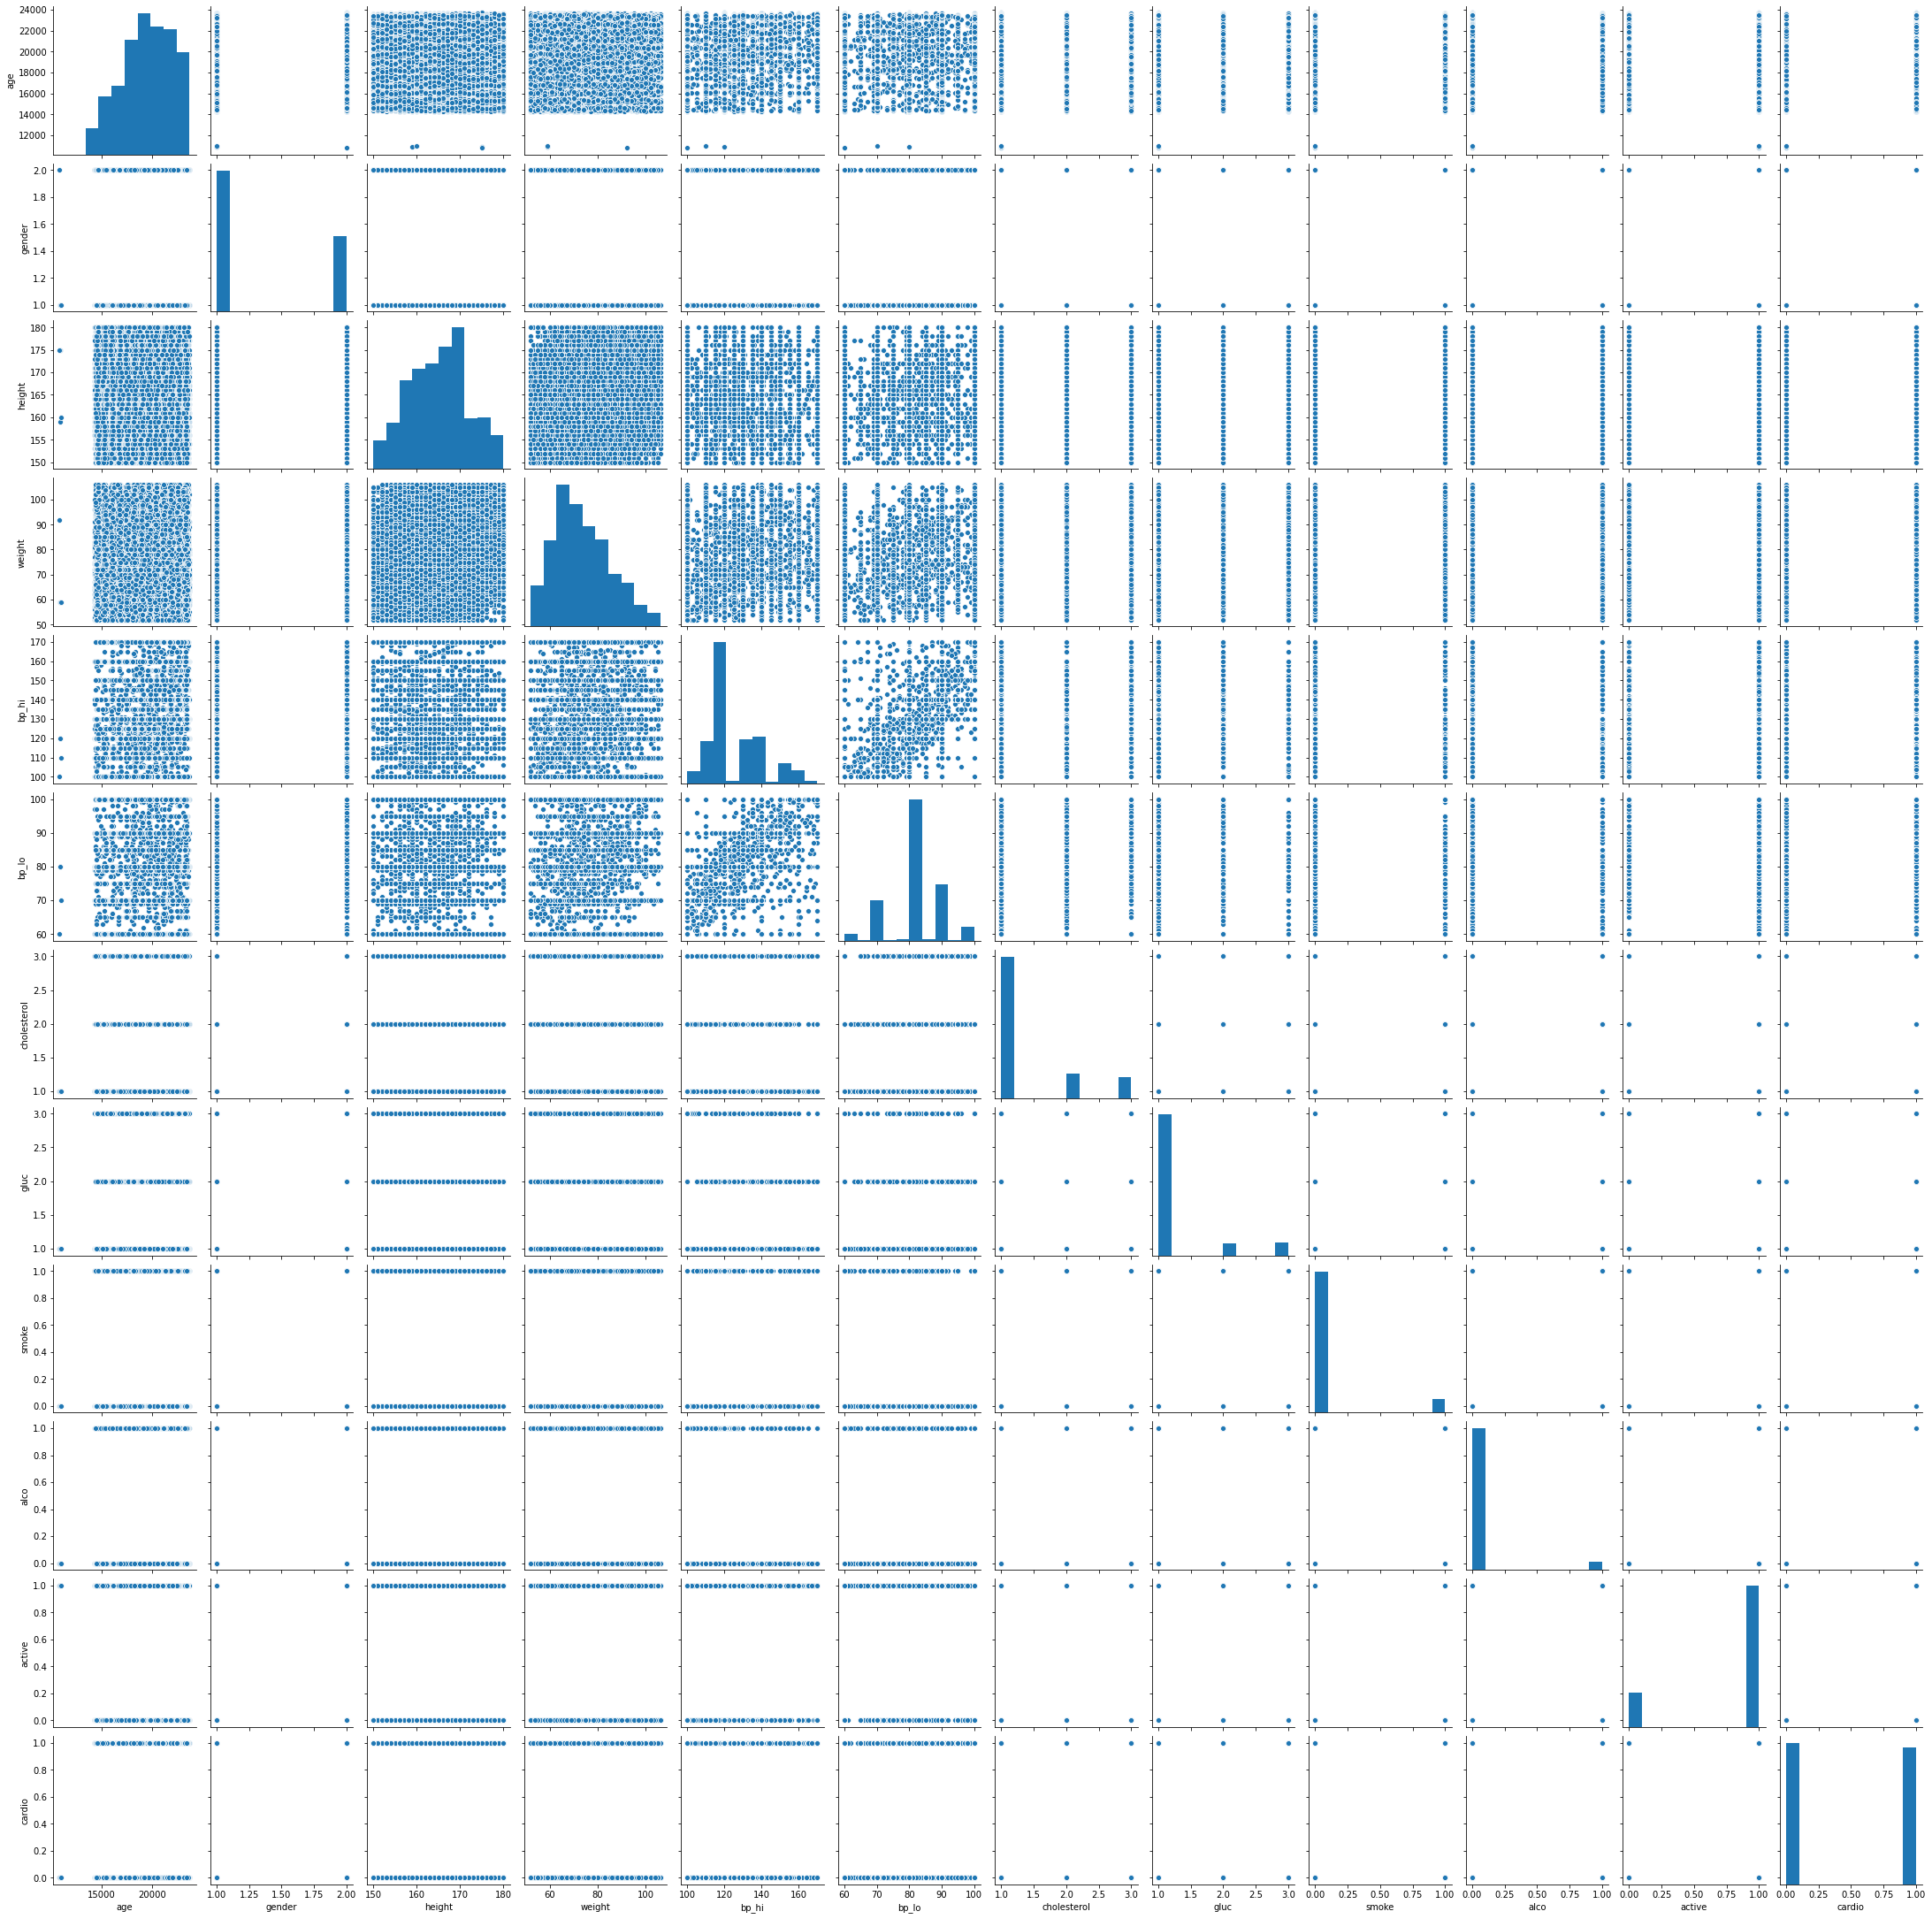

In [13]:
sns.pairplot(data)

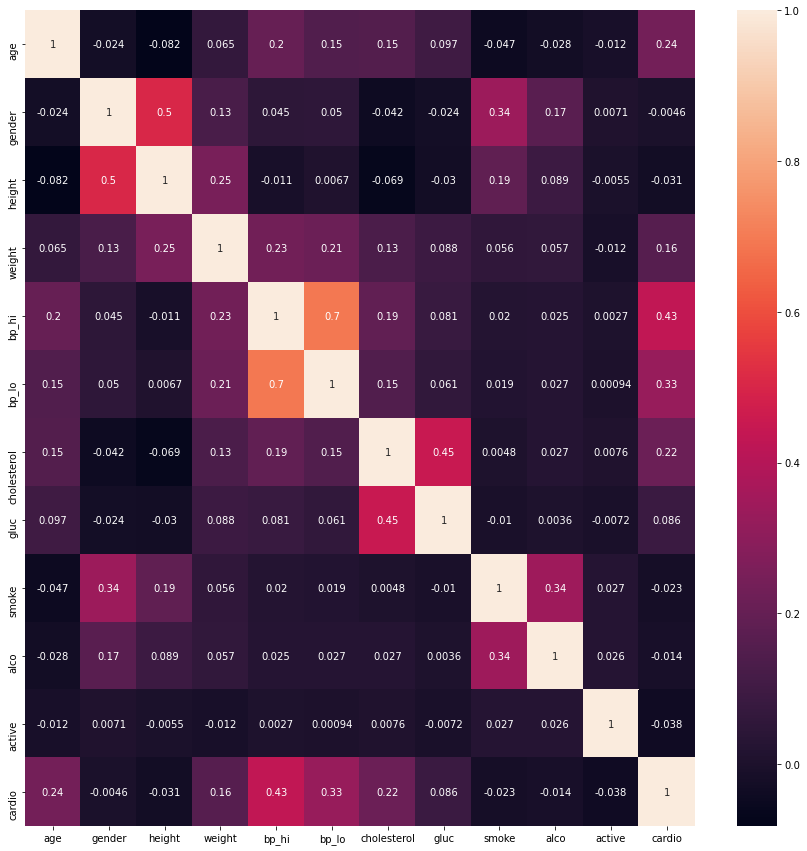

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot = True)

# AGE GROUPS

In [15]:
data['years'] = (data['age'] / 365).round().astype('int')
def categorize_age(age):
  if 0 < age <= 2:
    return "Infants"
  elif 2 < age <= 5:
    return "Pre School Child"
  elif 5 < age <= 12:
    return "Child"
  elif 12 < age <= 19:
    return "Adolescent"
  elif 19 < age <= 24:
    return "Young Adult"
  elif 24 < age <= 44:
    return "Adult"
  elif 44 < age <= 65:
    return "Middle Aged"
  elif 65 < age:
    return "Aged"

def categorize_age_tees(age):
  if 0 < age <= 10:
    return "10s"
  elif 10 < age <= 30:
    return "20s"
  elif 20 < age <= 30:
    return "30s"
  elif 30 < age <= 40:
    return "40s"
  elif 40 < age <= 50:
    return "50s"
  elif 50 < age <= 60:
    return "60s"
  elif 60 < age <= 70:
    return "70+"
# age transformations
data['age_category'] = data['years'].apply(lambda x: categorize_age(x))
data['age_ts'] = data['years'].apply(lambda x: categorize_age_tees(x))

In [16]:
print("Average age of both men and women:",data.groupby('gender')['years'].mean())

Average age of both men and women: gender
1    53.479299
2    53.137872
Name: years, dtype: float64


Text(0.5, 1.0, 'Age distribution')

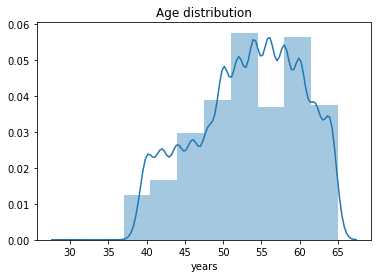

In [17]:
#Graphical representation of Distribution of age
sns.distplot(data.years, bins=10, kde=True)
plt.title("Age distribution")

In [18]:
#statistical analysis of aged people with repect to target variable.
pd.crosstab(data['age_category'],data['cardio'])

cardio,0,1
age_category,,
Adult,6077,2511
Middle Aged,24766,27302


Text(0, 0.5, 'No.of patients')

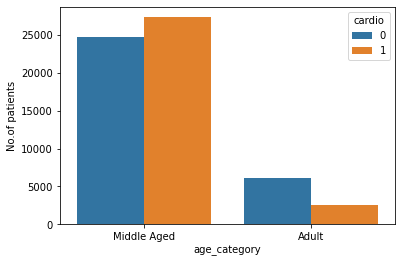

In [19]:
#Graphical representation of age_category
sns.countplot(x ='age_category',hue = 'cardio', data = data)
plt.ylabel("No.of patients")

# GENDER

In [20]:
male=pd.DataFrame(data.loc[data['gender'] == 2])
female=pd.DataFrame(data.loc[data['gender'] == 1])
print("The total no.of male:",len(male))
print("The total no.of Female:",len(female))

The total no.of male: 21092
The total no.of Female: 39564


Text(0, 0.5, 'no.of patients')

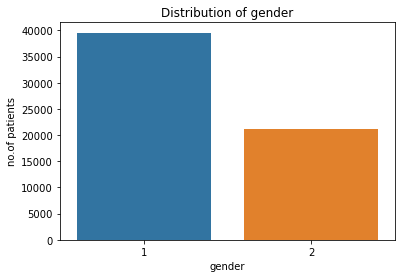

In [21]:
#Graphical representation of distribution of gender
sns.countplot(x ='gender',data=data)
plt.title("Distribution of gender")
plt.ylabel("no.of patients")

Text(0.5, 1.0, 'Distribution of gender with respect to target variable')

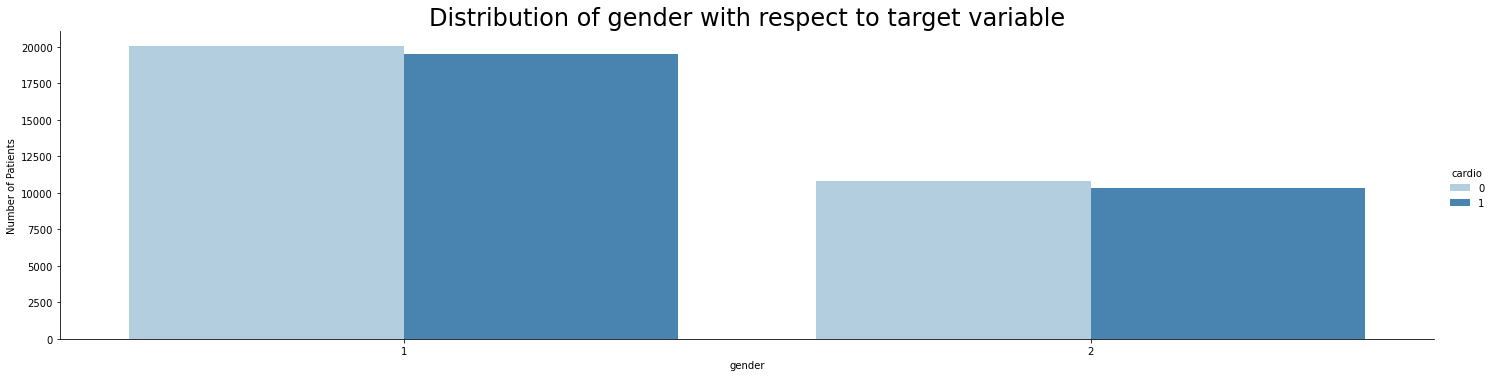

In [22]:
#Graphical representation of gender with respect to target variable
sns.factorplot("gender", data=data, aspect=4.0, kind='count',hue='cardio', palette="Blues")
plt.ylabel('Number of Patients')
plt.title("Distribution of gender with respect to target variable",fontsize=24)

# SMOKING

the total no.of smokers: 5197
the total no.of non_smokers cases: 55459


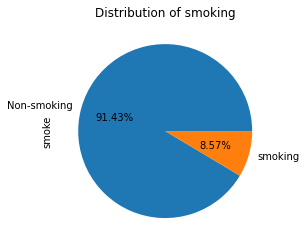

In [33]:
#Statistical analysis of attribute'smoke'.
non_smoker=pd.DataFrame(data.loc[data['smoke'] == 0])
smoker=pd.DataFrame(data.loc[data['smoke'] == 1])
print("the total no.of smokers:",len(smoker))
print("the total no.of non_smokers cases:",len(non_smoker))
plt.title('Distribution of smoking')
#Graphical representation of attribute'smoke'.
data["smoke"].value_counts().plot(kind='pie',labels=('Non-smoking','smoking'),autopct='%1.2f%%')

In [24]:
#Statistical analysis of attribute'smoke' with respect to gender.
pd.crosstab(data['smoke'],data['gender'])

gender,1,2
smoke,,
0,38897,16562
1,667,4530


In [49]:
#Statistical analysis of attribute'smoke' with respect to target variable.
pd.crosstab(data['smoke'],data['cardio'])

cardio,0,1
smoke,,
0,28005,27454
1,2838,2359


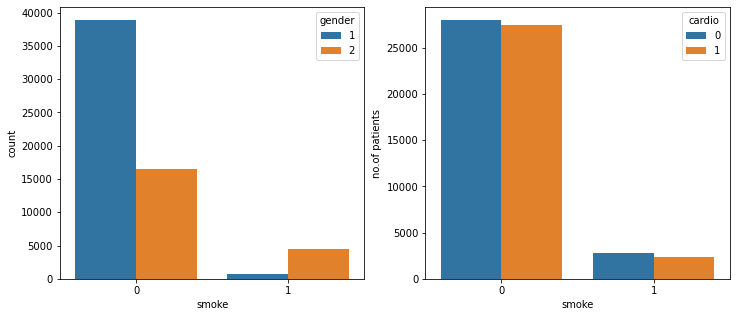

In [55]:
#plot for the total number of cases based on gender and disease
matplotlib.rcParams['figure.figsize'] = (12, 5)
fig, ax =plt.subplots(1,2)
sns.countplot(x ='smoke',hue='gender',data=data,ax=ax[0])
plt.ylabel("no.of patients")
sns.countplot(x ='smoke',hue ='cardio',data=data,ax=ax[1])
plt.ylabel("no.of patients")
fig.show()


In [56]:
#Statistical analysis of smoking with respect to gender and target variable.
pd.crosstab(smoker['gender'],data['cardio'])

cardio,0,1
gender,,
1,349,318
2,2489,2041


In [57]:
#Statistical analysis of non-smoking with respect to gender and target variable.
pd.crosstab(non_smoker['gender'],data['cardio'])

cardio,0,1
gender,,
1,19703,19194
2,8302,8260


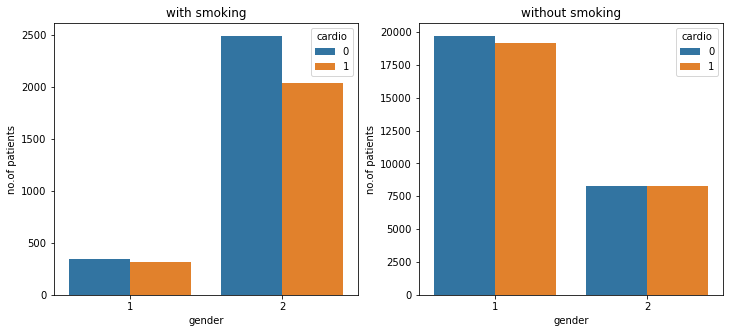

In [58]:
#plot for the active smoking cases and non-smoking cases with respect to the gender.
matplotlib.rcParams['figure.figsize'] = (12, 5)
fig, ax =plt.subplots(1,2)
a1=sns.countplot(x ='gender',hue ='cardio',data=smoker,ax=ax[0])
a1.set_ylabel("no.of patients")
a1.set_title("with smoking")
a2=sns.countplot(x ='gender',hue ='cardio',data=non_smoker,ax=ax[1])
a2.set_ylabel("no.of patients")
a2.set_title("without smoking")
fig.show()

Text(0.5, 1.0, 'which gender and age group are mostly addicted to smoking and are diseased?')

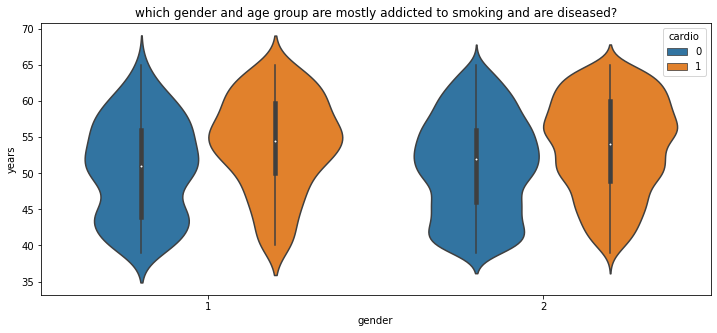

In [59]:
#which age group is more prone to smoking
sns.violinplot(x ='gender',y='years',data=smoker,hue='cardio')
plt.title("which gender and age group are mostly addicted to smoking and are diseased?")


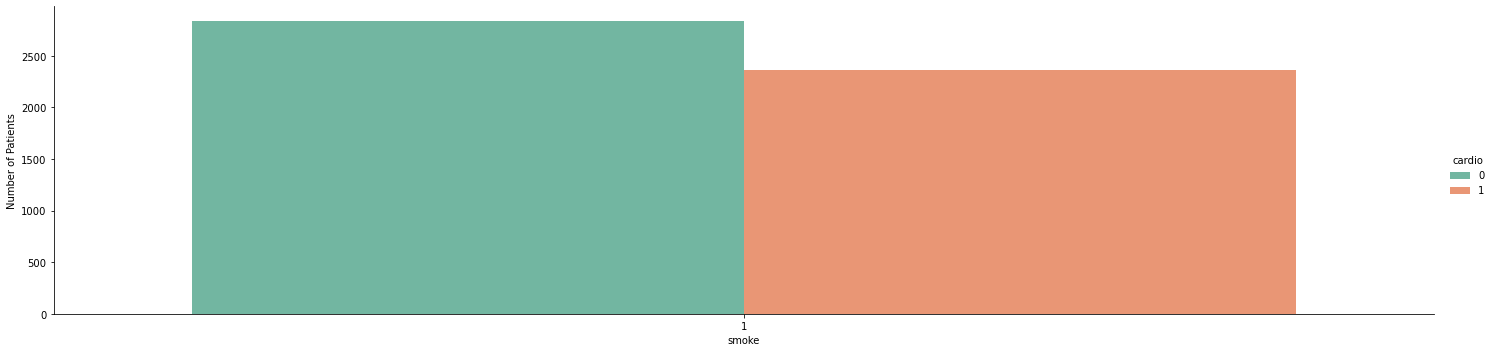

In [60]:
#Did all smokers got effected?
a1= sns.factorplot("smoke", data=smoker, aspect=4.0, kind='count',hue='cardio', palette="Set2")
a1.set_ylabels('Number of Patients')

OBSERVATION:
1.There were more number of non-smokers.
2.The graph depicts that there are more  number of people who doesn’t smoke.
3.Out of 6169 smoking cases there are 813 women and 5356 men, 2929 are effected and 3240 are healthy.
4.Out of 63831 no smoking cases there are 44717 women and 19114 men, 32050 are effected and 31781 are healthy.
5.Non-smokers were mostly prone to the disease.
6.Men smoke more frequently.
7.Out of 2929 smoking and effected people, 2541 were men and 388 women.
8.Out of 3240 smoking but healthy people ,2815  men and 425 women.
9.Out of  3250 effected non-smokers ,9822 were men and 22228 women
10.Out of 31781 non-smokers and healthy , 9292 were men and 22489 are women.
11.Men aged 60’s were mostly addicted to smoking and are diseased.
12.Non-smoking men were mostly effected.
13.90% of the smokers were effected.Smoking is not a major risk factor.


# ALCOHOL CONSUMPTION

the total no.of alcohol intake  cases: 3159
the total no.of non_alcohol cases: 57497


Text(0.5, 1.0, 'Distribution of patients with respect to alcohol consumption')

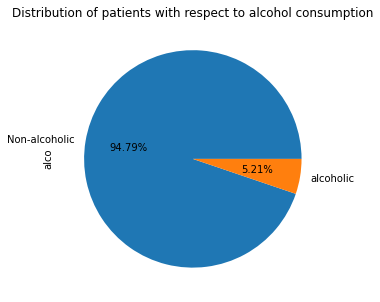

In [62]:
#Statistical analysis of attribute'alco'.
alcohol=pd.DataFrame(data.loc[data['alco'] == 1])
non_alcohol=pd.DataFrame(data.loc[data['alco'] == 0])
print("the total no.of alcohol intake  cases:",len(alcohol))
print("the total no.of non_alcohol cases:",len(non_alcohol))
#Graphical representation of attribute'alco'.
data["alco"].value_counts().plot(kind='pie',labels=('Non-alcoholic','alcoholic'),autopct='%1.2f%%')
plt.title("Distribution of patients with respect to alcohol consumption")

In [64]:
#Statistical analysis of attribute'alco' with respect to gender
pd.crosstab(data['alco'],data['gender'])

gender,1,2
alco,,
0,38586,18911
1,978,2181


In [65]:
#Statistical analysis of attribute'alco' with respect to target variable
pd.crosstab(data['smoke'],data['cardio'])

cardio,0,1
smoke,,
0,28005,27454
1,2838,2359


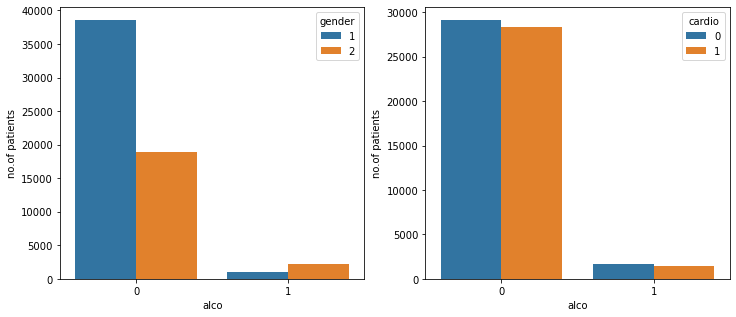

In [66]:
#plot for the total number of cases based on gender and disease
matplotlib.rcParams['figure.figsize'] = (12, 5)
fig, ax =plt.subplots(1,2)
a1=sns.countplot(x ='alco',hue ='gender',data=data,ax=ax[0])
a1.set_ylabel("no.of patients")
a2=sns.countplot(x ='alco',hue ='cardio',data=data,ax=ax[1])
a2.set_ylabel("no.of patients")
fig.show()

In [67]:
#Statistical analysis of alcohol consumption with respect to gender and target variable
pd.crosstab(alcohol['gender'],data['cardio'])

cardio,0,1
gender,,
1,507,471
2,1193,988


In [68]:
#Statistical analysis of non-alcohol with respect to gender and target variable.
pd.crosstab(non_alcohol['gender'],data['cardio'])

cardio,0,1
gender,,
1,19545,19041
2,9598,9313


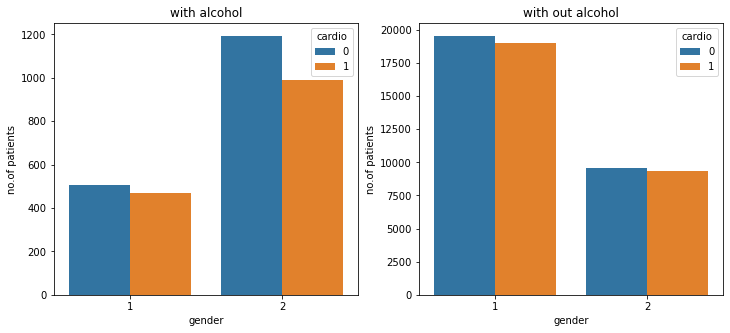

In [74]:
#plot for the active and non-active alcohol consumption cases with respect to the gender.
matplotlib.rcParams['figure.figsize'] = (12, 5)
fig, ax =plt.subplots(1,2)
a1=sns.countplot(x ='gender',hue ='cardio',data=alcohol,ax=ax[0])
a1.set_ylabel("no.of patients")
a1.set_title("with alcohol")
a2=sns.countplot(x ='gender',hue ='cardio',data=non_alcohol,ax=ax[1])
a2.set_ylabel("no.of patients")
a2.set_title("with out alcohol")
fig.show()

Text(0.5, 1.0, 'which age group and gender more prone to CVD')

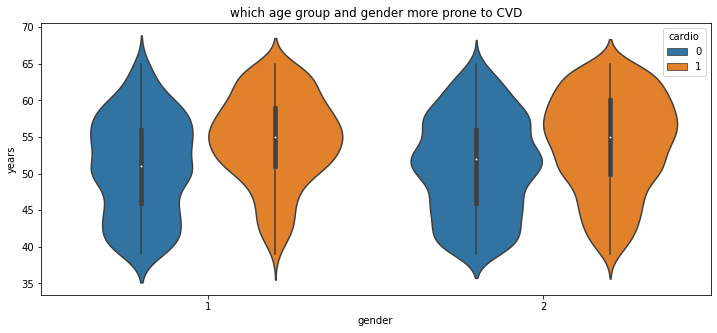

In [77]:
#which age group and gender is more prone to alcohol
sns.violinplot(x ='gender',y='years',data=alcohol,hue='cardio')
plt.title("which age group and gender more prone to CVD")

Text(0.5, 1.0, 'Did all alcoholic got effected')

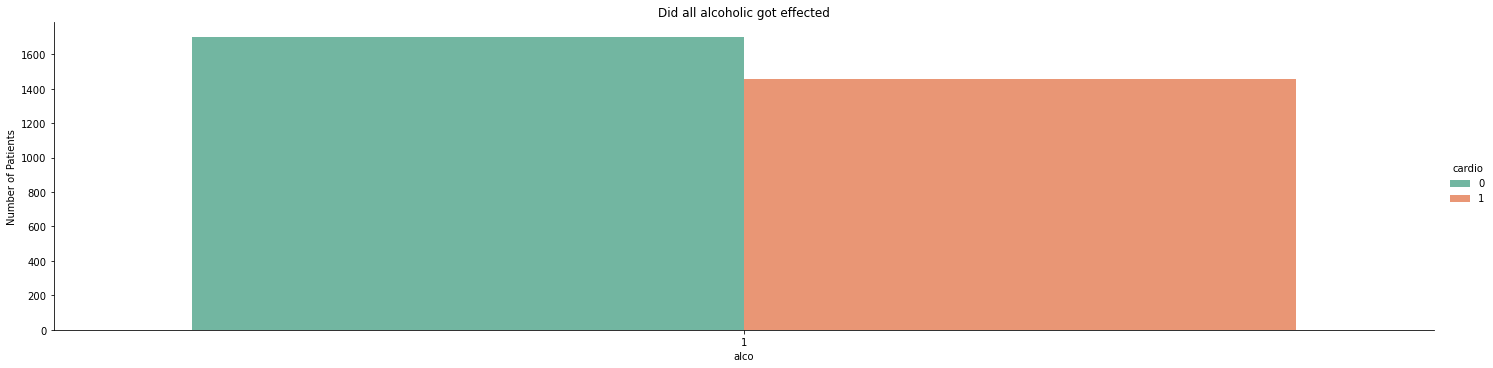

In [78]:
#Did all alcoholic got effected?
g1= sns.factorplot("alco", data=alcohol, aspect=4.0, kind='count',hue='cardio', palette="Set2")
g1.set_ylabels('Number of Patients')
plt.title("Did all alcoholic got effected")

OBSERVATION:
1.The graph depicts that there are more number of non-alcoholic patients.
2.Out of 3764 alcohol intake cases, there are 1161 women and 2603 men, 1823 are effected and 1941 are healthy.
3.out of 66236 normal cases,there are 44369 women and 21867 men, 33156 are effected and 33080 are healthy.
4. men consume more alcohol.
5.Alchol consumption doesn’t seem to be contributing factor as non-alcholic were also equally effected.
6.Out of 1823 alcoholic and effected cases,there are 1244 men and 579 women.
7.Out of 1941 alcoholic and healthy,there are 1359 men  and 582 women.
8.80% of people who were alcoholic were diseased.
9.men who doesn’t consume alcohol were mostly diseased.
10.Men aged 60’s were mostly addicted to alcohol  and are diseased.
11.90% of patients who are alcoholic are diseased. Hence,alcohol consumption doesn’t seem to be contributing factor because disease rate is less than non-diseased rate.


# PHYSICAL ACTIVITY

the total no.of non_activity cases: 11911
the total no.of activity cases: 48745


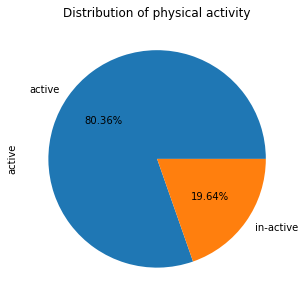

In [87]:
#Statistical analysis of attribute'active'.
no_activity=pd.DataFrame(data.loc[data['active'] == 0])
activity=pd.DataFrame(data.loc[data['active'] == 1])
print("the total no.of non_activity cases:",len(no_activity))
print("the total no.of activity cases:",len(activity))
plt.title("Distribution of physical activity")
#Graphical representation of attribute'active'.
data["active"].value_counts().plot(kind='pie',labels=("active","in-active"),autopct='%1.2f%%')

In [85]:
#Statistical analysis of attribute'active' with respect to gender
pd.crosstab(data['active'],data['gender'])

gender,1,2
active,,
0,7851,4060
1,31713,17032


In [84]:
#Statistical analysis of attribute'active' with respect to target variable
pd.crosstab(data['active'],data['cardio'])

cardio,0,1
active,,
0,5596,6315
1,25247,23498


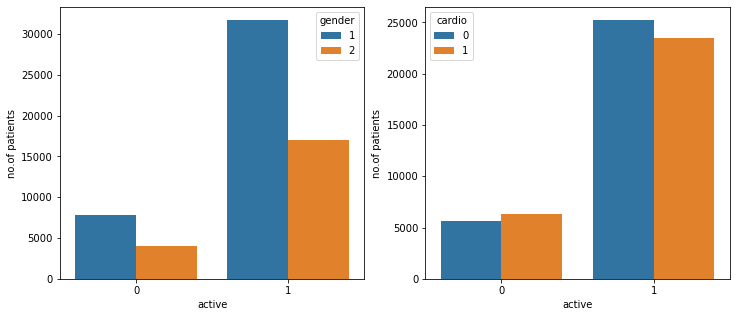

In [86]:
#plot for the total number of cases based on gender and disease
matplotlib.rcParams['figure.figsize'] = (12, 5)
fig, ax =plt.subplots(1,2)
a1=sns.countplot(x ='active',hue ='gender',data=data,ax=ax[0])
a1.set_ylabel("no.of patients")
a2=sns.countplot(x ='active',hue ='cardio',data=data,ax=ax[1])
a2.set_ylabel("no.of patients")
fig.show()

In [88]:
#Statistical analysis of active patients with respect to gender and target variable
pd.crosstab(activity['gender'],data['cardio'])

cardio,0,1
gender,,
1,16318,15395
2,8929,8103


In [90]:
#Statistical analysis of in-activepatients with respect to gender and target variable.
pd.crosstab(no_activity['gender'],data['cardio'])

cardio,0,1
gender,,
1,3734,4117
2,1862,2198


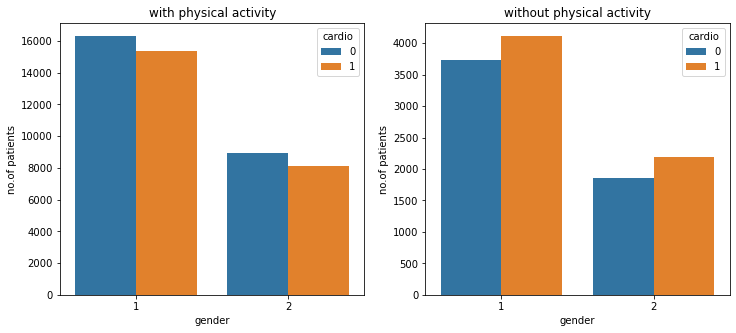

In [92]:
#plot for the active and in-active cases with respect to the gender and disease.
matplotlib.rcParams['figure.figsize'] = (12, 5)
fig, ax =plt.subplots(1,2)
#plot for the physical activity cases with respect to the gender
a1=sns.countplot(x ='gender',hue ='cardio',data=activity,ax=ax[0])
a1.set_ylabel('no.of patients')
a1.set_title("with physical activity")
#plot for the no_activity cases with respect to the gender
a2=sns.countplot(x ='gender',hue ='cardio',data=no_activity,ax=ax[1])
a2.set_ylabel('no.of patients')
a2.set_title("without physical activity")
fig.show()

Text(0.5, 1.0, 'In-Active patients')

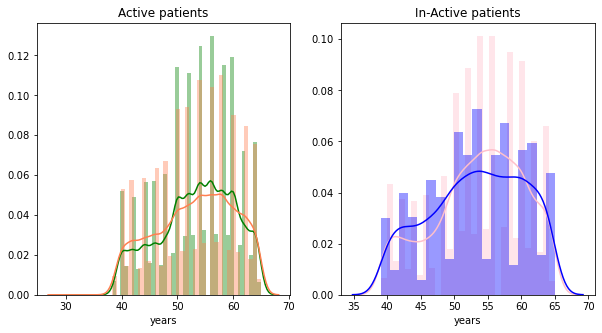

In [107]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
sns.distplot(data['years'][(data['gender']==1) & (data['active']==1)],ax = ax1,color='green')
sns.distplot(data['years'][(data['gender']==2) & (data['active']==1)],ax = ax1,color='coral')
ax1.set_title('Active patients')
sns.distplot(data['years'][(data['gender']==1) & (data['active']==0)],ax = ax2,color='pink')
sns.distplot(data['years'][(data['gender']==2) & (data['active']==0)],ax = ax2,color='blue')
ax2.set_title('In-Active patients')

Text(0.5, 1.0, 'Age group who were in-active and effected.')

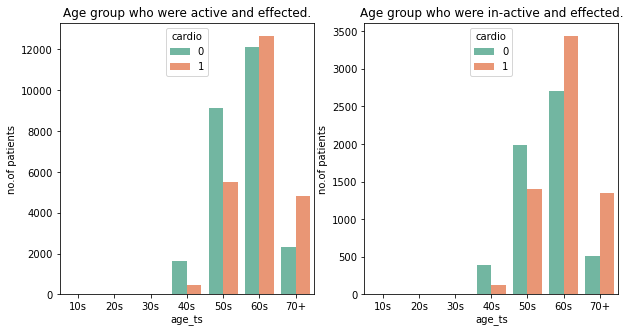

In [109]:
#which age group is more in number  and effected with disease.
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
a1=sns.countplot(x ='age_ts',hue ='cardio',data=activity,palette="Set2", order = ['10s','20s','30s','40s','50s','60s','70+'],ax=ax1)
a1.set_ylabel("no.of patients")
ax1.set_title("Age group who were active and effected.")
a1=sns.countplot(x ='age_ts',hue ='cardio',data=no_activity,palette="Set2", order = ['10s','20s','30s','40s','50s','60s','70+'],ax=ax2)
a1.set_ylabel("no.of patients")
ax2.set_title("Age group who were in-active and effected.")

OBSERVATION:
1.All age groups who were in-active were merely  diseased.
2. Age group 60’s and 70’s  who were active are also more prone to CVD.
3.There are more number of people engaged in physical activity.
4.Out of 56,261 active cases there are 19,745 men and 36,516 women, 27618 are effected and 28643 are healthy.
5.Out of 13,739 in-active cases there are 4725 men and 9014 women,7361 are effected and 6378 are healthy.
6.Physically in-active people are more prone to CVD.
7. women are less prone to the disease when compared to men.
8.Out of 27,618 physically active and effected ,there are 9,751 male and 17,867 female.
9.Out of 28,643 physically active and healthy ,there are 994 male and 18,649 female.
10.Out of 7,361 physically in-active and diseased,there are 2,612 male and 4,749 female.
11.Out of 6,378  physically in-active and are healthy,there are 2113 male and 4264 female.


# BODY MASS INDEX

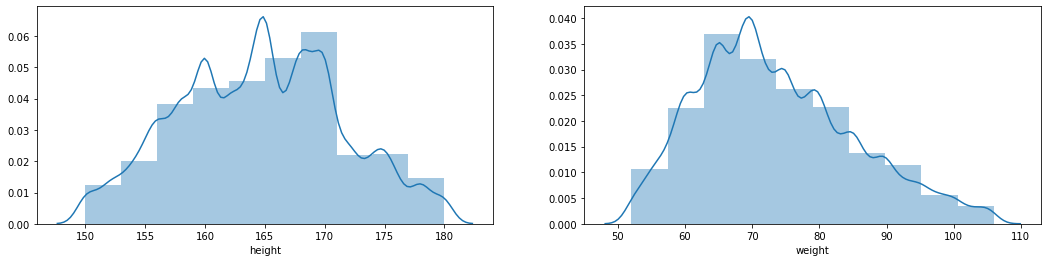

In [110]:
# Distributions of age, height and weight variables
fig, axes = plt.subplots(1,2, figsize=(18,4))
sns.distplot(data.height, bins=10, kde=True, ax=axes[0])
sns.distplot(data.weight, bins=10, kde=True, ax=axes[1])

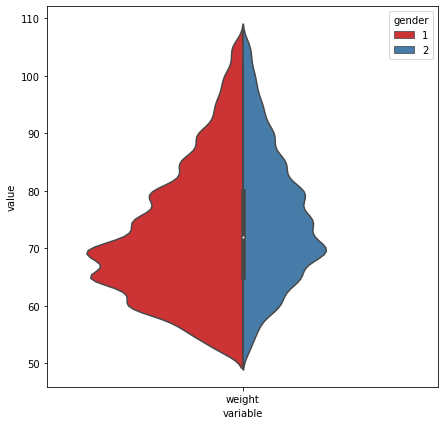

In [111]:
# Weight Distribution
df_melt = pd.melt(frame=data, value_vars=['weight'], id_vars=['gender'])
plt.figure(figsize=(7, 7))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set1");

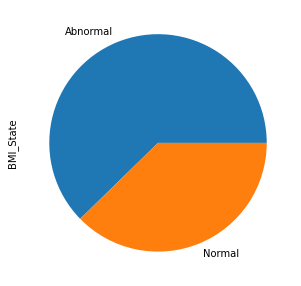

In [116]:
#BMI calculation
data['BMI'] = data['weight']/((data['height']/100)**2)

# categorize normal & abnormal
def bmi_categorize(bmi_score):
  if 18.5 <= bmi_score <= 25:
    return "Normal"
  else:
    return "Abnormal"

data["BMI_State"] = data["BMI"].apply(lambda x: bmi_categorize(x))
data["BMI_State"].value_counts().plot(kind='pie')

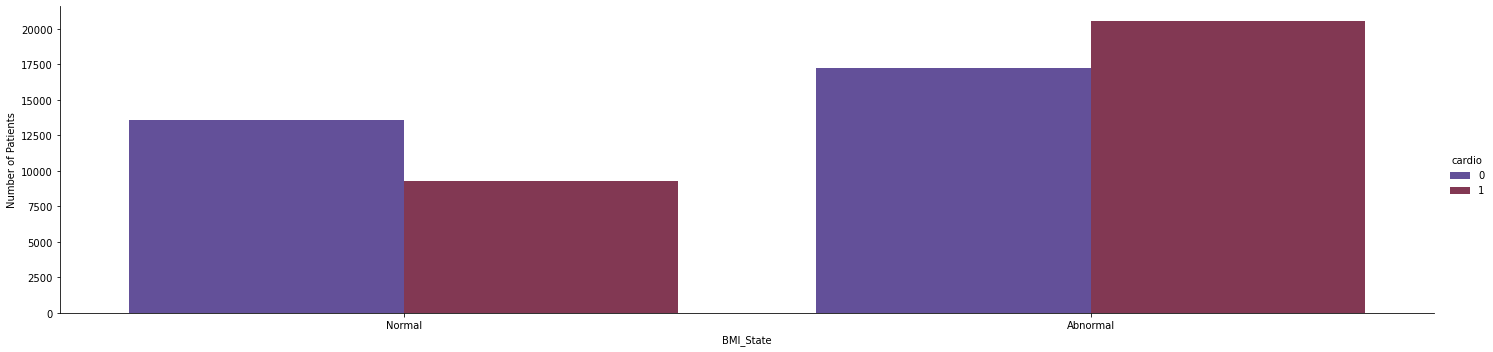

In [117]:
#Variation of BMI in diseased and non-diseased
g4 = sns.factorplot("BMI_State", data=data, aspect=4.0, kind='count',hue='cardio', palette="twilight")
g4.set_ylabels('Number of Patients')

Text(0.5, 1.0, 'which age group and gender frequency is more?')

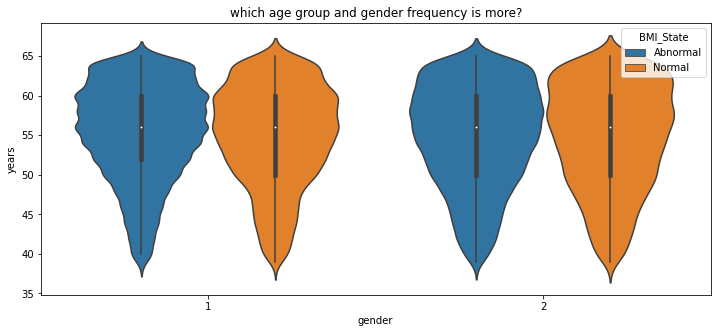

In [125]:
#which age group and gender frequency is more 
sns.violinplot(x ='gender',y='years',data=disease,hue='BMI_State')
plt.title("which age group and gender frequency is more?")

Text(0.5, 1.0, 'which age group and gender frequency is more?')

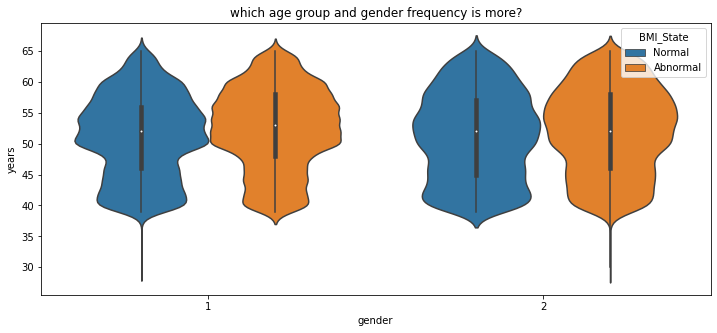

In [126]:
#which age group and gender frequency is more with in non-diseased
sns.violinplot(x ='gender',y='years',data=no_disease,hue='BMI_State')
plt.title("which age group and gender frequency is more?")

OBSERVATIONS
1.There were mostly abnormal cases.
2.weight of women is more when compared to men.
3.Height 165cm and weight 70 kgs were at peaks in distribution plots.
4.Abnormal patients were mostly diseased.


# BLOOD PRESSURE

In [128]:
def categorize_blood_pressure(x):
  if x['bp_hi'] < 120 and x['bp_lo'] < 80:
    return "Normal"
  elif 120 <= x['bp_hi'] <= 129 and x['bp_lo'] < 80:
    return "Elevated"
  elif 130 <= x['bp_hi'] <= 139 or 80 <= x['bp_lo'] <= 89:
    return "High Blood Pressure(Stage 1)"
  elif  140 <= x['bp_hi'] <= 180 or 90 <= x['bp_lo'] <= 120:
    return "High Blood Pressure(Stage 2)"
  elif  (x['bp_hi'] > 180 and  x['bp_lo'] > 120) or (x['bp_hi'] > 180 or x['bp_lo'] > 120):
    return "Hypertensive Crisis"
# categorizing blood pressure
data['bp_category'] = data.apply(categorize_blood_pressure, axis=1)

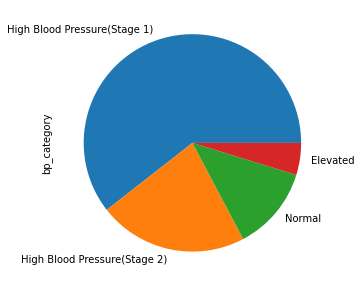

In [129]:
# Visulization of blood pressure category
data["bp_category"].value_counts().plot(kind='pie')

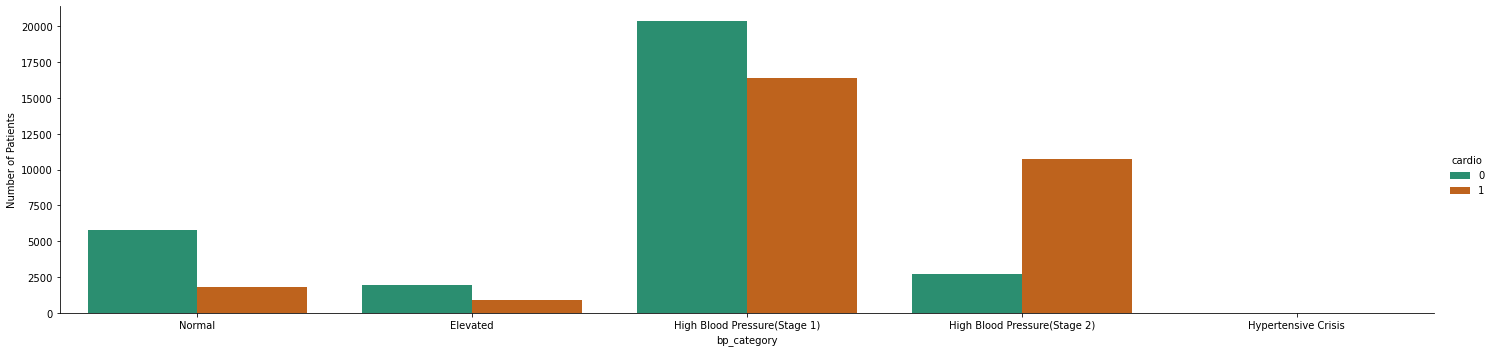

In [130]:
g3 = sns.factorplot("bp_category", data=data, aspect=4.0, kind='count',hue='cardio', palette='Dark2', order=["Normal", "Elevated", "High Blood Pressure(Stage 1)", "High Blood Pressure(Stage 2)", "Hypertensive Crisis"])
g3.set_ylabels('Number of Patients')

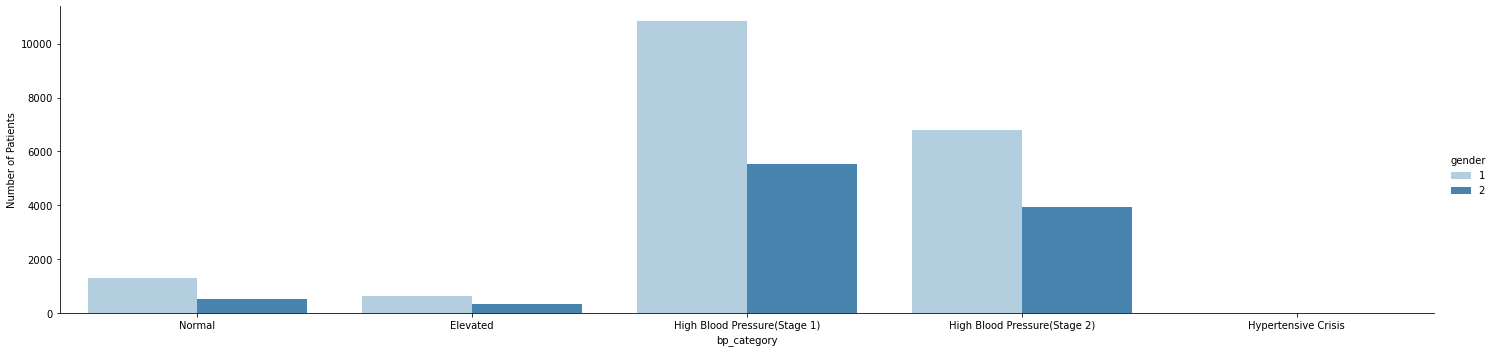

In [133]:
#which gender is more prone to the disease.
g3 = sns.factorplot("bp_category", data=disease, aspect=4.0, kind='count',hue='gender', palette='Blues', order=["Normal", "Elevated", "High Blood Pressure(Stage 1)", "High Blood Pressure(Stage 2)", "Hypertensive Crisis"])
g3.set_ylabels('Number of Patients')


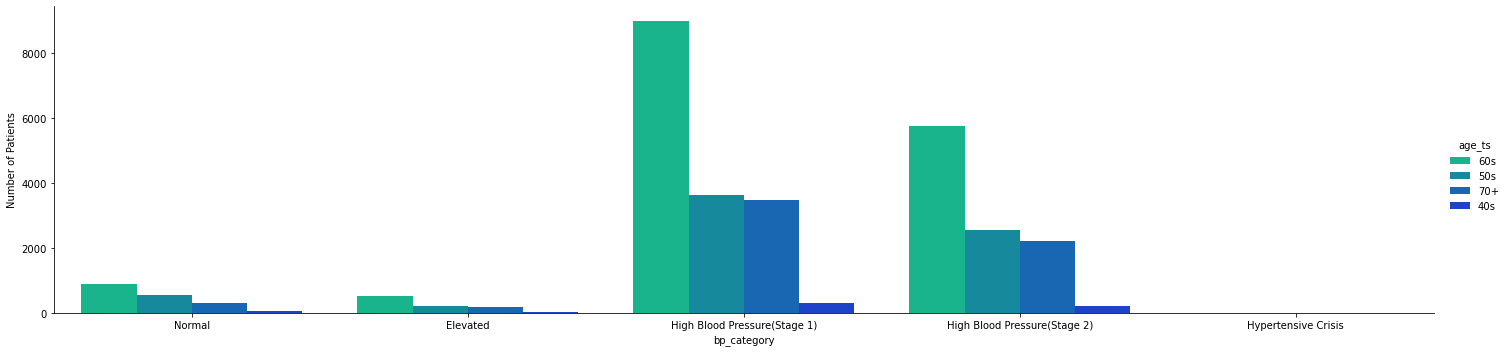

In [132]:
#which age group tests were mostly conducted
g3 = sns.factorplot("bp_category", data=disease, aspect=4.0, kind='count',hue='age_ts', palette='winter_r', order=["Normal", "Elevated", "High Blood Pressure(Stage 1)", "High Blood Pressure(Stage 2)", "Hypertensive Crisis"])
g3.set_ylabels('Number of Patients')


OBSERVATIONS
1.High Blood pressure(Stage1) cases are mostly examined and are healthy.
2.High Blood pressure(stage2) cases were more prone to CVD.
3.women were mostly reported in stage 1 and 2.
4.women were mostly prone to CVD from stage2.
4.age group 60’s and 70’s are mostly reported cases.



In [135]:
##Disease Datafrmae
no_disease=pd.DataFrame(data.loc[data['cardio'] == 0])
disease=pd.DataFrame(data.loc[data['cardio'] == 1])
print("the total no.of active cases:",len(disease))
print("the total no.of normal cases:",len(no_disease))

the total no.of active cases: 29813
the total no.of normal cases: 30843


# CHOLESTEROL

total no of normal cases: 45975
total no of above normal cases: 7929
total no of well above normal cases: 6752


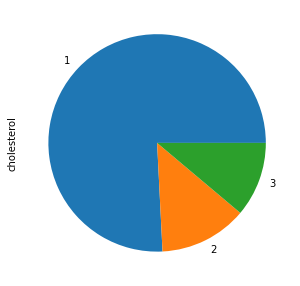

In [137]:
matplotlib.rcParams['figure.figsize'] = (5,5)
n=pd.DataFrame(data.loc[data['cholesterol'] == 1])
an=pd.DataFrame(data.loc[data['cholesterol'] == 2])
wan=pd.DataFrame(data.loc[data['cholesterol'] == 3])
print("total no of normal cases:",len(n))
print("total no of above normal cases:",len(an))
print("total no of well above normal cases:",len(wan))
data["cholesterol"].value_counts().plot(kind='pie')

In [138]:
pd.crosstab(data['cholesterol'],data['cardio'])

cardio,0,1
cholesterol,,
1,25984,19991
2,3234,4695
3,1625,5127


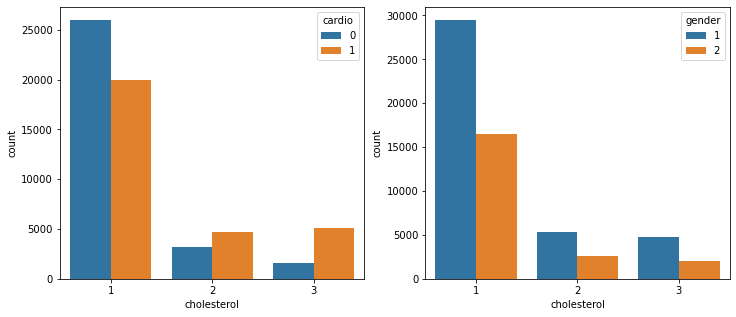

In [139]:
matplotlib.rcParams['figure.figsize'] = (12, 5)
fig, ax =plt.subplots(1,2)
sns.countplot(x ='cholesterol',hue ='gender',data=data,ax=ax[1])
sns.countplot(x ='cholesterol',hue ='cardio',data=data,ax=ax[0])
fig.show()

In [140]:
pd.crosstab(n['gender'],data['cardio'])

cardio,0,1
gender,,
1,16696,12789
2,9288,7202


In [141]:
pd.crosstab(an['gender'],data['cardio'])

cardio,0,1
gender,,
1,2256,3111
2,978,1584


In [142]:
pd.crosstab(wan['gender'],data['cardio'])

cardio,0,1
gender,,
1,1100,3612
2,525,1515


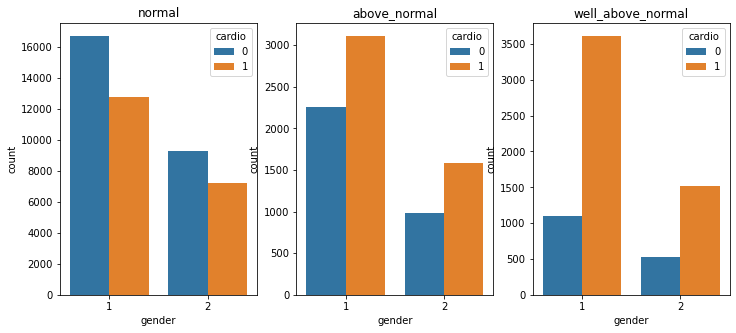

In [143]:
matplotlib.rcParams['figure.figsize'] = (12, 5)
fig, ax =plt.subplots(1,3)
sns.countplot(x ='gender',hue ='cardio',data=n,ax=ax[0])
ax[0].set_title("normal")
sns.countplot(x ='gender',hue ='cardio',data=an,ax=ax[1])
ax[1].set_title("above_normal")
sns.countplot(x ='gender',hue ='cardio',data=wan,ax=ax[2])
ax[2].set_title("well_above_normal")
fig.show()

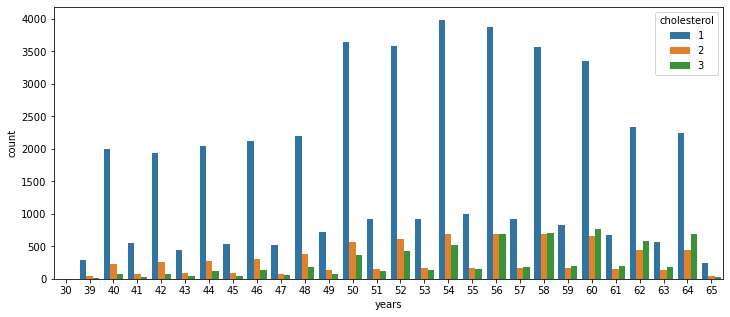

In [144]:
#which age group cases were mostly recorded.
sns.countplot(x ='years',hue ='cholesterol',data=data)

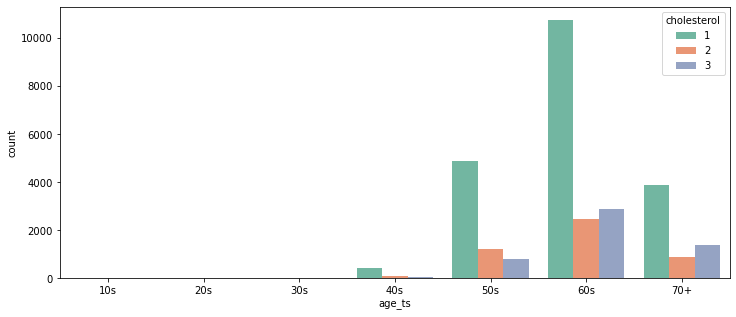

In [145]:
#which age group is more prone to disease with levels of cholesterol.
matplotlib.rcParams['figure.figsize'] = (12, 5)
sns.countplot(x='age_ts', hue='cholesterol', data = disease, palette="Set2", order = ['10s','20s','30s','40s','50s','60s','70+'])

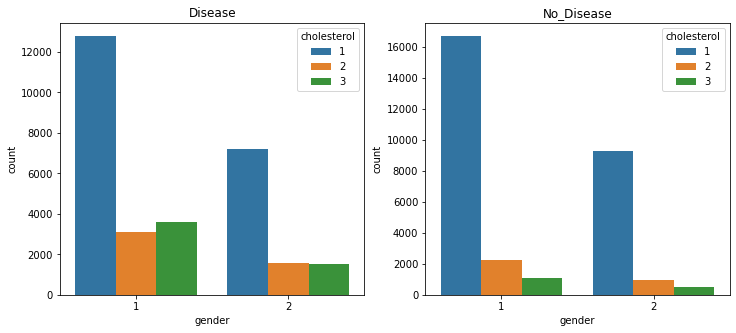

In [147]:
#how cholesterol levels vary between diseased and non_diseased.
matplotlib.rcParams['figure.figsize'] = (12, 5)
fig, ax =plt.subplots(1,2)
sns.countplot(x ='gender',hue ='cholesterol',data=disease,ax=ax[0])
ax[0].set_title("Disease")
sns.countplot(x ='gender',hue ='cholesterol',data=no_disease,ax=ax[1])
ax[1].set_title("No_Disease")
fig.show()

OBSERVATION
1.Normal level of cases were mostly recorded.
2.well above normal cases were more prone to CVD.
3.Out of 70,000 cases ,45,975 normal cases with 29,484 women and 16,490 men ;7929 above normal cases with 5367 men and 2562 women;6752 well above normal cases with 4712 women and 2040 men were recorded.

4.19,991 cases with 7202 men and 12,789 women were effected ;25,984 healthy cases with 9288 men and 16,696 women are resulted from normal cholesterol level.
5.3234 cases with 2,256 men and 1584 women were effected;4695 healthy cases with 3111 male and 978 women are resulted from above normal level .
6.5127 cases with 1515 men and 3612c women were effected;1625 healthy cases with 525 men and 1100 women are resulted from well above normal level.
7.In diseased cases well above normal and avove normal levels were relatively high.
8.Men were mostly prone to the disease


total no of normal cases: 51833
total no of above normal cases: 4261
total no of well above normal cases: 4562


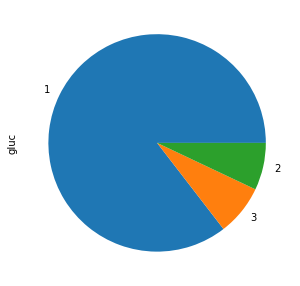

In [148]:
matplotlib.rcParams['figure.figsize'] = (5, 5)
n1=pd.DataFrame(data.loc[data['gluc'] == 1])
an1=pd.DataFrame(data.loc[data['gluc'] == 2])
wan1=pd.DataFrame(data.loc[data['gluc'] == 3])
print("total no of normal cases:",len(n1))
print("total no of above normal cases:",len(an1))
print("total no of well above normal cases:",len(wan1))
data["gluc"].value_counts().plot(kind='pie')

In [149]:
pd.crosstab(data['gluc'],data['gender'])

gender,1,2
gluc,,
1,33581,18252
2,2834,1427
3,3149,1413


In [150]:
pd.crosstab(data['gluc'],data['cardio'])

cardio,0,1
gluc,,
1,27276,24557
2,1800,2461
3,1767,2795


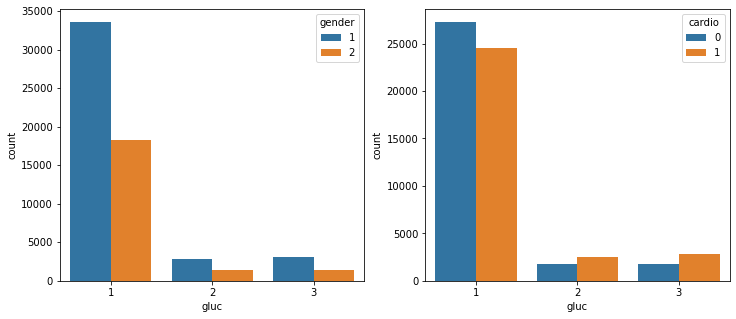

In [151]:
matplotlib.rcParams['figure.figsize'] = (12, 5)
fig, ax =plt.subplots(1,2)
sns.countplot(x ='gluc',hue ='gender',data=data,ax=ax[0])
sns.countplot(x ='gluc',hue ='cardio',data=data,ax=ax[1])
fig.show()

In [152]:
pd.crosstab(n1['gender'],data['cardio'])

cardio,0,1
gender,,
1,17664,15917
2,9612,8640


In [153]:
pd.crosstab(an1['gender'],data['cardio'])

cardio,0,1
gender,,
1,1216,1618
2,584,843


In [154]:
pd.crosstab(wan1['gender'],data['cardio'])

cardio,0,1
gender,,
1,1172,1977
2,595,818


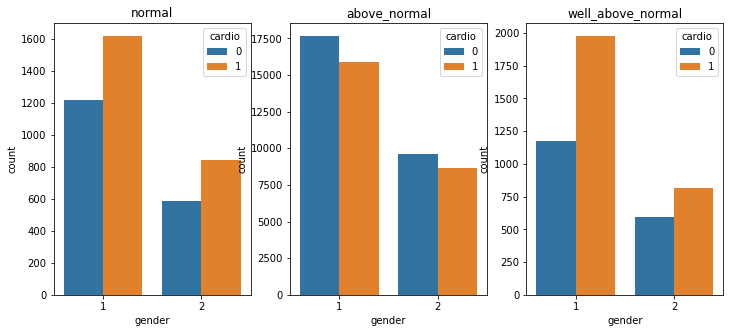

In [155]:
matplotlib.rcParams['figure.figsize'] = (12, 5)
fig, ax =plt.subplots(1,3)
sns.countplot(x ='gender',hue ='cardio',data=an1,ax=ax[0])
ax[0].set_title("normal")
sns.countplot(x ='gender',hue ='cardio',data=n1,ax=ax[1])
ax[1].set_title("above_normal")
sns.countplot(x ='gender',hue ='cardio',data=wan1,ax=ax[2])
ax[2].set_title("well_above_normal")
fig.show()


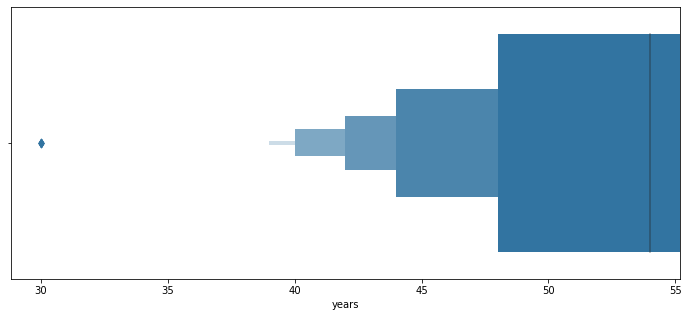

In [156]:
#which age group cases were mostly recorded.
sns.boxenplot(x ='years',hue ='gluc',data=data)

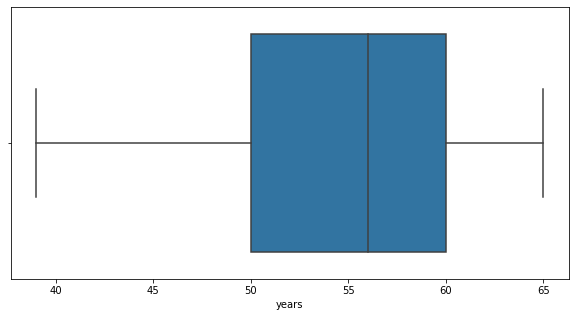

In [157]:
#which age group is more prone to disease with levels of glucose.
matplotlib.rcParams['figure.figsize'] = (10, 5)
sns.boxplot(x ='years',hue ='gluc',data=disease)

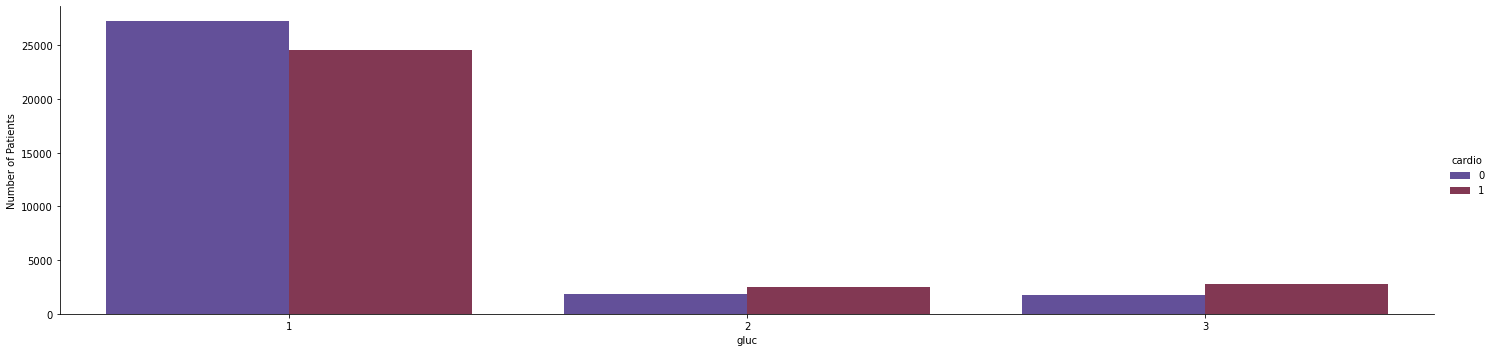

In [158]:
g4 = sns.factorplot("gluc", data=data, aspect=4.0, kind='count',hue='cardio', palette="twilight")
g4.set_ylabels('Number of Patients')

OBSERVATION
1.More number of normal cases were reported.
2.men were mostly prone with normal and well above normal levels.
3.well above normal and above normal were diseased.
4.men above 50’s were effected.
5.Out of 70,000 cases 51833 normal cases  with 18252 men and 33581 women ;4261 above normal cases with 1427 men and 2834 women;4562 well above normal cases with 1413 men and 3149 women were recorded.
6.Out of 24557 diseased with 8640 men and 1597 women were effected;27276 not disease cases with 9612 men 17664 women are recorded from normal levels.
7.Out of 2461 diseased there are 843 men and 1618 women;1800 not diseased cases with 584 men and 1216 women.
8.out of 2795 diseased cases,there are 818 men and 1977 women;1767 not diseased cases there are 595 men and 1172 women.


# VARIATION OF FACTORS WITH RESPECT TO DISEASE

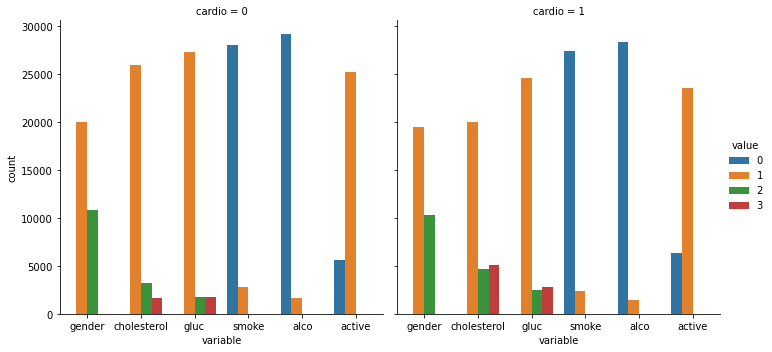

In [159]:
#how external and iternal factors differ with respect to the disease.
df= pd.melt(data, id_vars=['cardio'], value_vars=['gender','cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",data=df, kind="count");

# FEATURE ENGINEERING

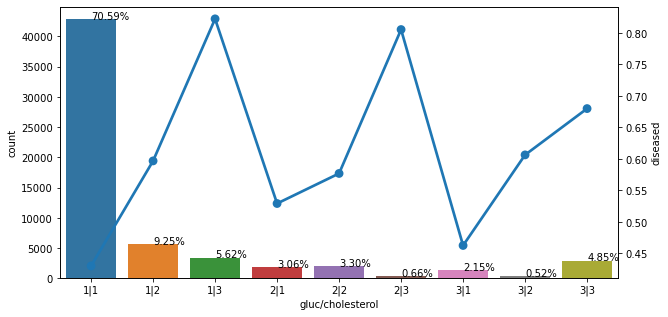

In [160]:
#impact of glucose and cholesterol on disease
data['gluc/cholesterol'] = data['gluc'].apply(str)+'|'+data['cholesterol'].apply(str)

tmp = pd.crosstab(data['gluc/cholesterol'],data['cardio'],normalize='index')
tmp.reset_index()
tmp.columns = ['Not diseased','diseased']

fig, ax = plt.subplots(1,1)
sns.countplot(data['gluc/cholesterol'],order=list(tmp.index), ax=ax)
plot2 = ax.twinx()
sns.pointplot(tmp.index,tmp['diseased'],order=list(tmp.index),ax=plot2)
for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x()+patch.get_width()/2,height,'{:.2f}{}'.format(height/len(data['gluc/cholesterol'])*100,'%'))
plt.show()

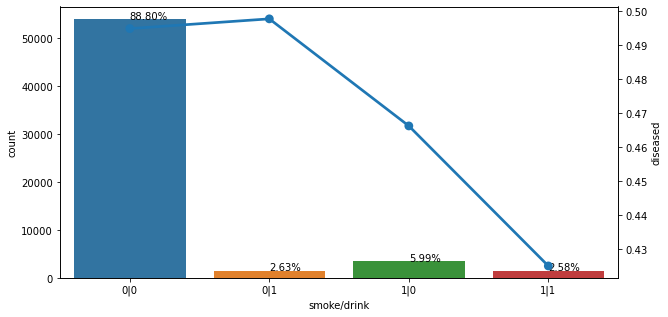

In [161]:
#impact of smoking and drinking with respect to the disease
data['smoke/drink'] = data['smoke'].apply(str)+'|'+data['alco'].apply(str)

tmp = pd.crosstab(data['smoke/drink'],data['cardio'],normalize='index')
tmp.reset_index()
tmp.columns = ['Not diseased','diseased']

fig, ax = plt.subplots(1,1)
sns.countplot(data['smoke/drink'],order=list(tmp.index), ax=ax)
plot2 = ax.twinx()
sns.pointplot(tmp.index,tmp['diseased'],order=list(tmp.index),ax=plot2)
for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x()+patch.get_width()/2,height,'{:.2f}{}'.format(height/len(data['smoke/drink'])*100,'%'))
plt.show()

# EFFECT OF INTERNAL FACTORS ON  EXTERNAL FACTORS

# EFFECT OF SMOKING

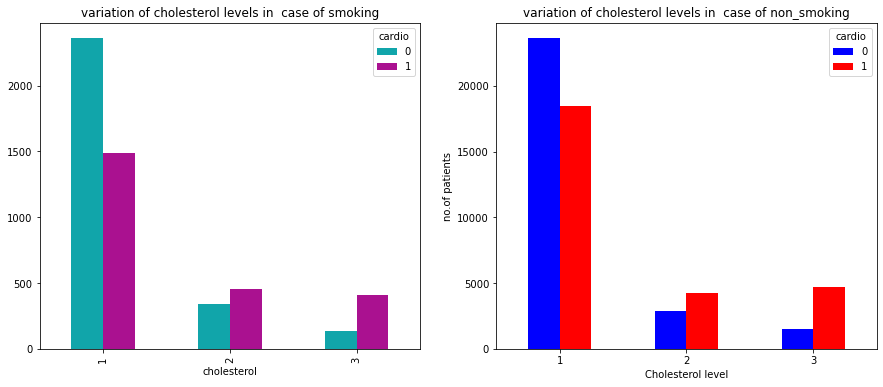

In [162]:
matplotlib.rcParams['figure.figsize'] = (12, 5)
fig, ax =plt.subplots(1,2)
pd.crosstab(smoker.cholesterol,data.cardio).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ],ax=ax[0])
ax[0].set_title("variation of cholesterol levels in  case of smoking")
plt.xlabel('Cholesterol level')
plt.xticks(rotation = 0)
plt.ylabel('no.of patients')
pd.crosstab(non_smoker.cholesterol,data.cardio).plot(kind="bar",figsize=(15,6),color=['b','r' ],ax=ax[1])
plt.xlabel('Cholesterol level')
plt.xticks(rotation = 0)
plt.ylabel('no.of patients')
ax[1].set_title("variation of cholesterol levels in  case of non_smoking")
fig.show()

Text(0.5, 1.0, 'variation of glucose levels in  case of non_smoking')

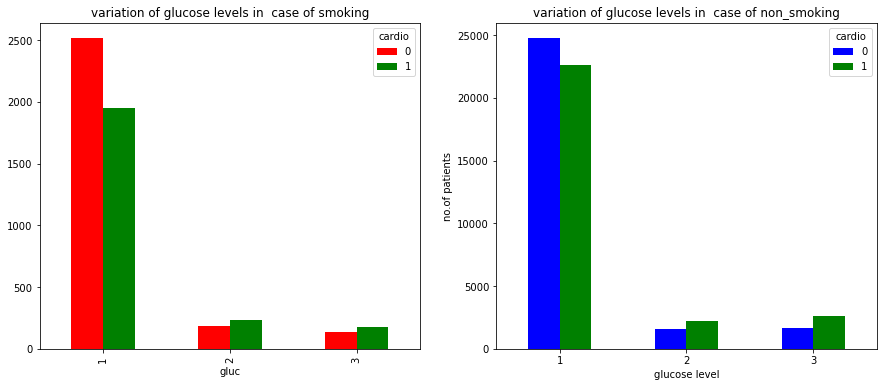

In [163]:
matplotlib.rcParams['figure.figsize'] = (12, 5)
fig, ax =plt.subplots(1,2)
pd.crosstab(smoker.gluc,data.cardio).plot(kind="bar",figsize=(15,6),color=['r','g' ],ax=ax[0])
ax[0].set_title("variation of glucose levels in  case of smoking")
plt.xlabel('glucose level')
plt.xticks(rotation = 0)
plt.ylabel('no.of patients')
pd.crosstab(non_smoker.gluc,data.cardio).plot(kind="bar",figsize=(15,6),color=['b','g' ],ax=ax[1])
plt.xlabel('glucose level')
plt.xticks(rotation = 0)
plt.ylabel('no.of patients')
ax[1].set_title("variation of glucose levels in  case of non_smoking")

# EFFECT OF ALCOHOL

Text(0.5, 1.0, 'variation of cholesterol levels in  case of non_alcohol')

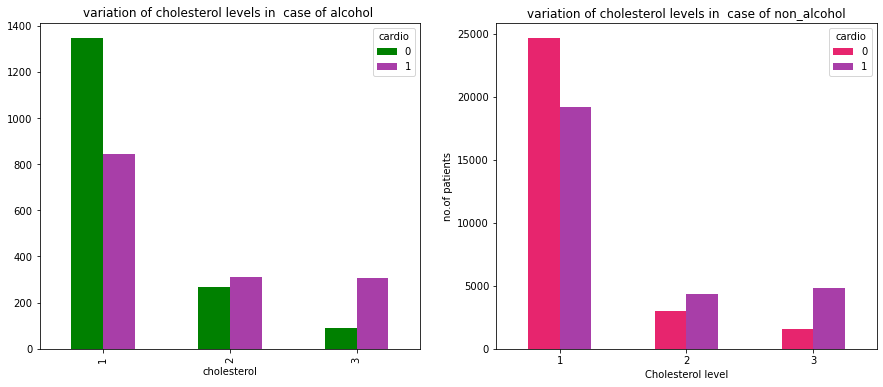

In [164]:
matplotlib.rcParams['figure.figsize'] = (12, 5)
fig, ax =plt.subplots(1,2)
pd.crosstab(alcohol.cholesterol,data.cardio).plot(kind="bar",figsize=(15,6),color=['g','#A83EA8' ],ax=ax[0])
plt.xlabel('Cholesterol level')
plt.xticks(rotation = 0)
plt.ylabel('no.of patients')
pd.crosstab(non_alcohol.cholesterol,data.cardio).plot(kind="bar",figsize=(15,6),color=['#E7256E','#A83EA8' ],ax=ax[1])
plt.xlabel('Cholesterol level')
plt.xticks(rotation = 0)
ax[0].set_title("variation of cholesterol levels in  case of alcohol ")
ax[1].set_title("variation of cholesterol levels in  case of non_alcohol")


Text(0.5, 1.0, 'variation of glucose levels in  case of non_alcohol')

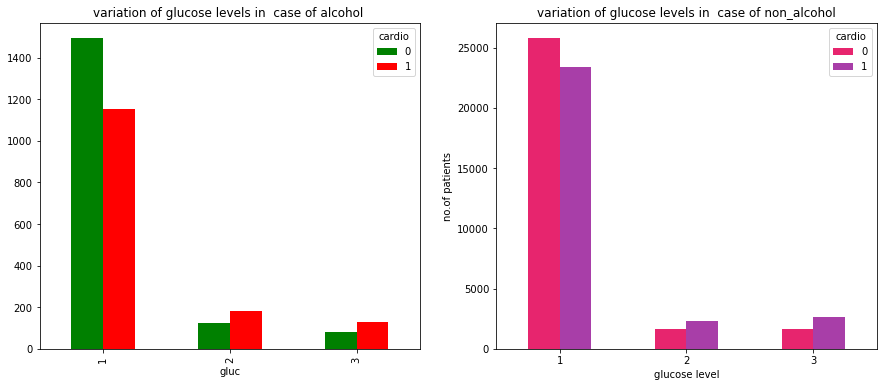

In [165]:
matplotlib.rcParams['figure.figsize'] = (12, 5)
fig, ax =plt.subplots(1,2)
pd.crosstab(alcohol.gluc,data.cardio).plot(kind="bar",figsize=(15,6),color=['g','r' ],ax=ax[0])
plt.xlabel('glucose level')
plt.xticks(rotation = 0)
plt.ylabel('no.of patients')
pd.crosstab(non_alcohol.gluc,data.cardio).plot(kind="bar",figsize=(15,6),color=['#E7256E','#A83EA8' ],ax=ax[1])
plt.xlabel('glucose level')
plt.xticks(rotation = 0)
plt.ylabel('no.of patients')
ax[0].set_title("variation of glucose levels in  case of alcohol ")
ax[1].set_title("variation of glucose levels in  case of non_alcohol")

# Variation in blood pressure within people who smoke and drink

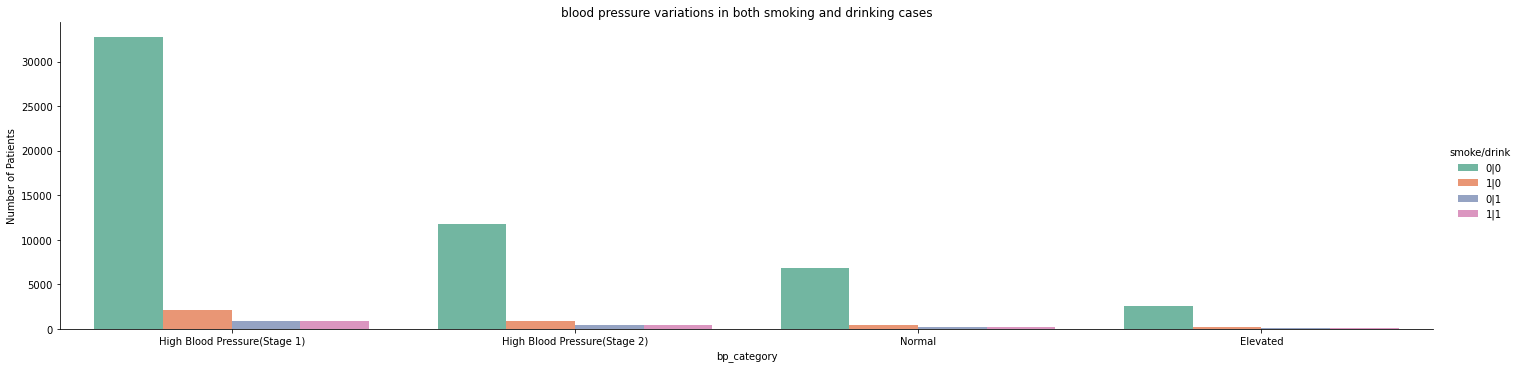

In [167]:
matplotlib.rcParams['figure.figsize'] = (20,40)
g4 = sns.factorplot("bp_category", data=data, aspect=4.0, kind='count',hue='smoke/drink', palette="Set2")
plt.title("blood pressure variations in both smoking and drinking cases")
g4.set_ylabels('Number of Patients')

# Variation in Glucose and cholesterol levels within people who smoke and drink

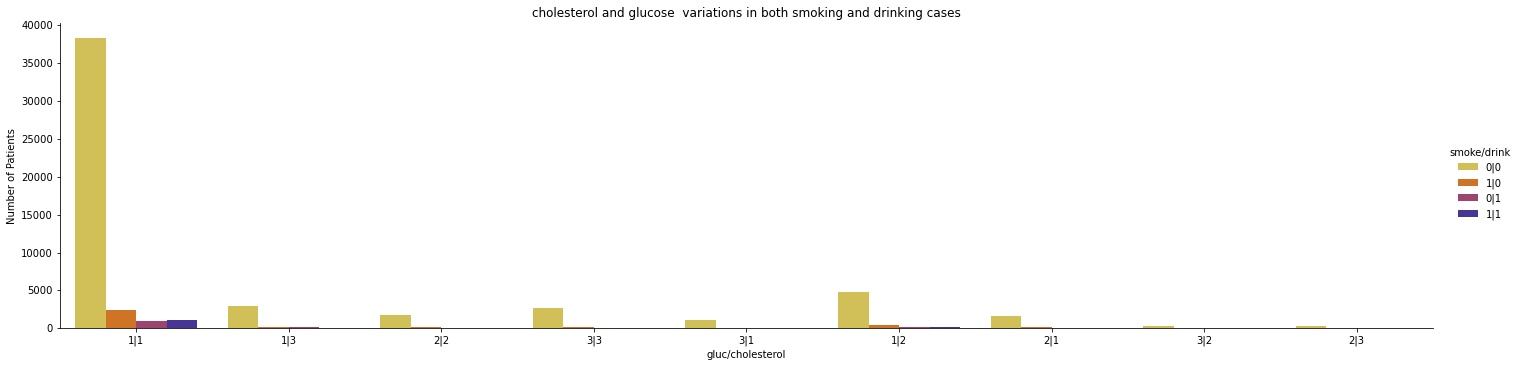

In [168]:
matplotlib.rcParams['figure.figsize'] = (20,40)
g4 = sns.factorplot("gluc/cholesterol", data=data, aspect=4.0, kind='count',hue='smoke/drink', palette="CMRmap_r")
plt.title("cholesterol and glucose  variations in both smoking and drinking cases")
g4.set_ylabels('Number of Patients')

# VARIATION OF CHOLESTEROL LEVELS WITH RESPECT TO PHYSICAL ACTIVITY

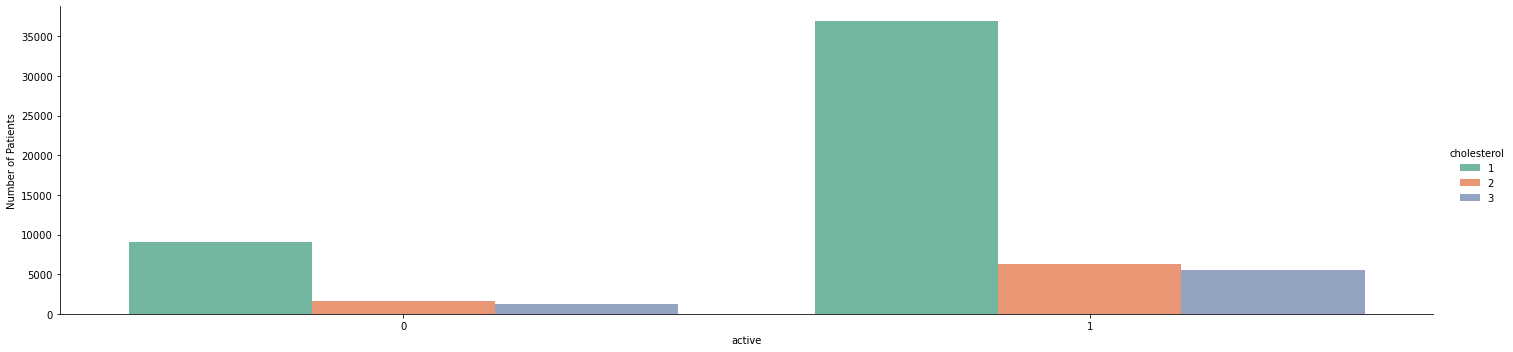

In [169]:
a1 = sns.factorplot("active", data=data, aspect=4.0, kind='count',hue='cholesterol', palette="Set2",)
a1.set_ylabels('Number of Patients')